# Pokémon Clustering Project

## Objective

The purpose of this project is to explore and analyze Pokémon data using clustering algorithms. We aim to group Pokémon based on their statistical attributes to uncover natural groupings and gain insights into their roles, types, and potential strategic uses. Clustering is particularly useful here as it enables us to identify patterns in the data without requiring predefined labels.

## What is Clustering?

Clustering is an unsupervised machine learning technique used to group data points into clusters such that data points within a cluster are more similar to each other than to those in other clusters. It is widely used in scenarios like market segmentation, document categorization, and customer profiling. 

### Key Algorithms Used in this Project:
- **K-Means Clustering**: Partitions the data into `k` clusters by minimizing the within-cluster variance.
- **Hierarchical Clustering**: Builds a tree-like structure of clusters, starting from individual points and merging iteratively.

## Introduce the Data

The dataset used in this project is a comprehensive Pokémon dataset containing attributes such as:
- **Stats**: Total, HP, Attack, Defense, Special Attack, Special Defense, Speed.
- **Categorical Data**: Primary (`type1`) and secondary (`type2`) types, generation, and legendary status.

This dataset allows us to explore Pokémon based on their attributes and identify patterns and groupings.

**Source**: The dataset was sourced from [Kaggle's Pokémon dataset repository](https://www.kaggle.com/abcsds/pokemon).

In [1]:
import pandas as pd
file_path = 'pokemon (1).csv'
pokemon_data = pd.read_csv(file_path)
pokemon_data.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


## Data Understanding and Visualization

Exploratory Data Analysis (EDA) was performed to better understand the data. Key steps included:
- Analyzing the distribution of numerical features like `total` stats and individual attributes.
- Correlation analysis to identify relationships between attributes.
- Visualization of Pokémon types and their frequencies.

EDA revealed significant variability in Pokémon stats and meaningful correlations between attributes like `attack` and `total`. This helps guide feature selection and informs the clustering process.

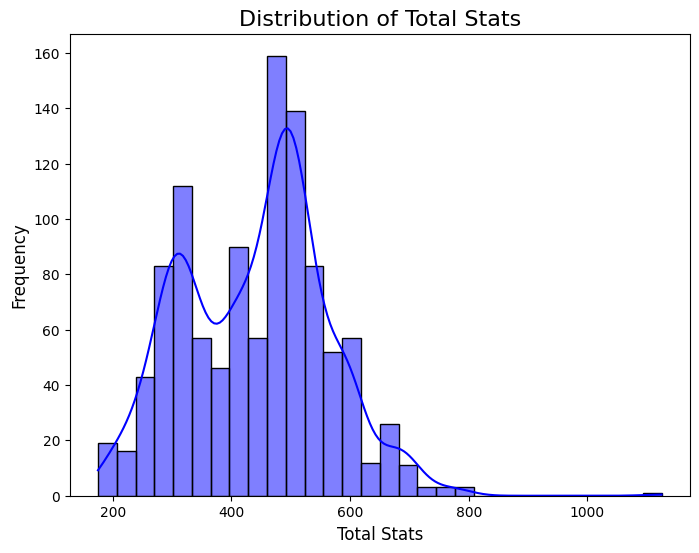

In [2]:
# Distribution of total stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(pokemon_data['total'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Stats', fontsize=16)
plt.xlabel('Total Stats', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

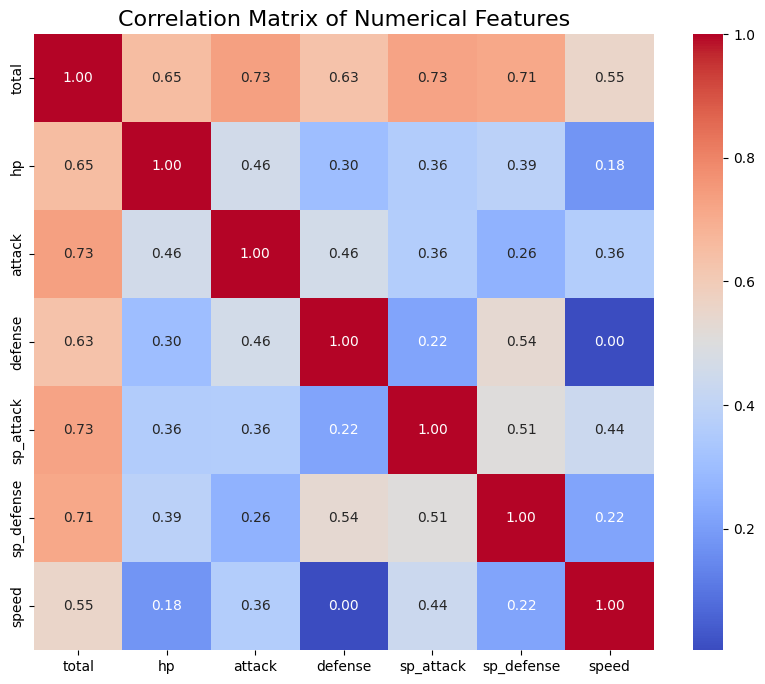

In [3]:
# Correlation matrix
correlation_matrix = pokemon_data[['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

## Preprocessing the Data

To prepare the data for clustering, the following preprocessing steps were taken:
1. **Handling Missing Values**: The secondary type (`type2`) had missing values, which were replaced with 'None'.
2. **Encoding Categorical Data**: Features like `type1` and `type2` were one-hot encoded to transform them into numerical form.
3. **Scaling Numerical Features**: Features like `total`, `hp`, `attack`, etc., were scaled using StandardScaler to ensure that clustering is not biased by varying scales of data.
These steps are crucial for ensuring accurate and unbiased clustering results.

In [4]:
# Fill missing values and encode categorical data
pokemon_data['type2'].fillna('None', inplace=True)
pokemon_data_encoded = pd.get_dummies(pokemon_data, columns=['type1', 'type2'], drop_first=True)
from sklearn.preprocessing import StandardScaler
features_to_scale = ['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
scaler = StandardScaler()
pokemon_data_encoded[features_to_scale] = scaler.fit_transform(pokemon_data_encoded[features_to_scale])

C:\Users\nwosu\AppData\Local\Temp\ipykernel_2096\4186362244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pokemon_data['type2'].fillna('None', inplace=True)


## Modeling (Clustering)

### K-Means Clustering
K-Means was chosen due to its simplicity and effectiveness for partitioning the Pokémon dataset into distinct clusters. This algorithm minimizes the variance within clusters, making it suitable for numerical data like Pokémon stats.

#### Why K-Means?
- Handles large datasets efficiently.
- Provides well-defined clusters based on feature similarity.

#### Alternative Models Considered:
- **Hierarchical Clustering**: While effective, it was not used due to computational constraints with large datasets.

In [5]:
# K-Means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(pokemon_data_encoded.drop(columns=['number', 'name', 'generation', 'legendary']))
pokemon_data['Cluster'] = kmeans_labels

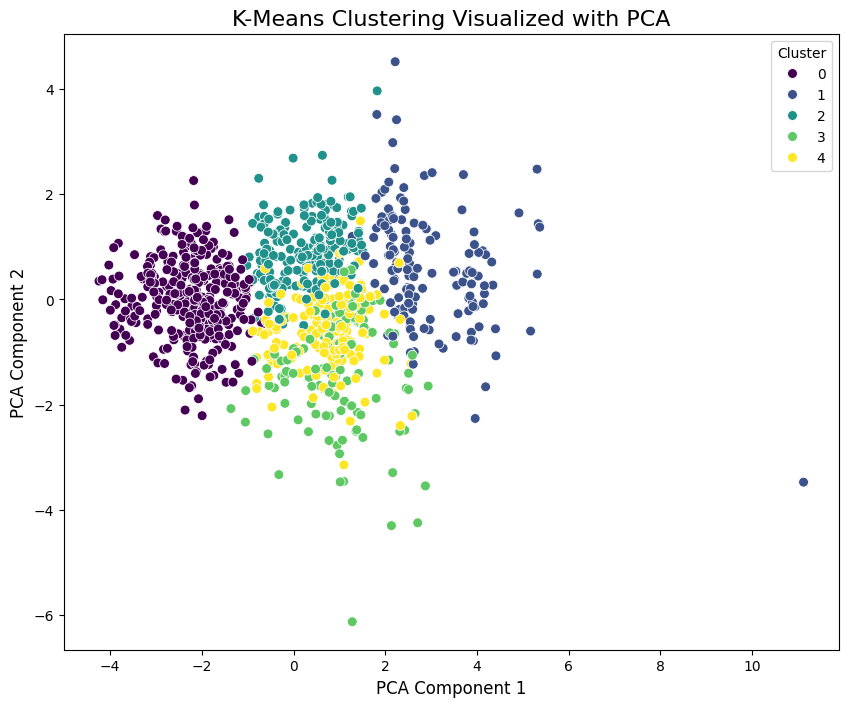

In [6]:
# Visualize clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(pokemon_data_encoded.drop(columns=['number', 'name', 'generation', 'legendary']))
pokemon_data['PCA1'] = reduced_features[:, 0]
pokemon_data['PCA2'] = reduced_features[:, 1]
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pokemon_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=50)
plt.title('K-Means Clustering Visualized with PCA', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.show()

## Storytelling (Clustering Analysis)

The clustering analysis revealed distinct groupings of Pokémon:
- **Cluster 0**: Dominated by high-tier Pokémon, including many legendary types.
- **Cluster 1**: Balanced Pokémon with well-rounded stats.
- **Cluster 2**: Early-stage Pokémon with relatively low stats.
- **Cluster 3**: Tanky Pokémon with high `hp` and `attack`.
- **Cluster 4**: Defensive Pokémon with strong `defense` and `sp_defense`.

This segmentation answers our initial questions and provides actionable insights into Pokémon roles and strategies.

In [7]:
# Analyzing cluster stats
cluster_analysis = pokemon_data.groupby('Cluster')[['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].mean()
cluster_analysis

,total,hp,attack,defense,sp_attack,sp_defense,speed
Cluster,,,,,,,
0,299.903409,49.488636,54.000000,51.176136,47.335227,48.525568,49.448864
1,628.910959,92.671233,119.130137,95.061644,119.568493,99.438356,103.041096
2,463.052174,67.560870,79.513043,66.178261,81.526087,73.200000,95.073913
3,496.000000,67.791045,75.940299,114.216418,83.380597,103.611940,51.283582
4,487.028571,95.185714,104.290476,85.461905,69.076190,73.219048,59.795238


## Impact Section

### Positive Impacts:
- **Player Insights**: Cluster analysis helps players understand Pokémon roles for strategic gameplay.
- **Game Balance**: Developers can use these insights to adjust Pokémon stats for fairer matches.

### Ethical Considerations:
- Overemphasis on legendary Pokémon clusters might skew game balance.
- Applying clustering on sensitive datasets requires careful consideration of biases.

## References

- Pokémon dataset: [Kaggle](https://www.kaggle.com/datasets/ulrikthygepedersen/pokemon-stats)
- Clustering concepts: Scikit-learn Documentation ([link](https://scikit-learn.org/stable/modules/clustering.html))

## Conclusion

This project successfully segmented Pokémon into clusters based on their stats, revealing distinct roles and characteristics. Future work could include integrating move data or using alternative clustering methods like DBSCAN to explore other patterns.